<a href="https://colab.research.google.com/github/remixwithkj/Backupmac/blob/main/pca/PCA_Visualization_2D_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction using PCA and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data_file = "https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/clustering/beer.csv"

In [3]:
beer_df = pd.read_csv(data_file)

In [4]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Kronenbourg,170,7,5.2,0.73
3,Heineken,152,11,5.0,0.77
4,Old_Milwaukee,145,23,4.6,0.28
5,Augsberger,175,24,5.5,0.40
6,Srohs_Bohemian_Style,149,27,4.7,0.42
7,Miller_Lite,99,10,4.3,0.43
8,Budweiser_Light,113,8,3.7,0.40
9,Coors,140,18,4.6,0.44


In [5]:
beer_df.columns

Index(['name', 'calories', 'sodium', 'alcohol', 'cost'], dtype='object')

In [6]:
features = ['calories', 'sodium', 'alcohol', 'cost']

## Apply PCA

In [7]:
from sklearn.decomposition import PCA

In [9]:
# to project the data on 2 dimensions only
pca = PCA(n_components=2)

In [10]:
pca.fit(beer_df[features])

PCA(n_components=2)

In [11]:
beer_2d = pca.transform(beer_df[features])

In [12]:
beer_2d

array([[-12.68498685,   1.18101432],
       [-20.04251523,  -2.12060267],
       [-37.7920267 ,  11.66569207],
       [-20.26485722,   5.94355211],
       [-14.45298759,  -6.68683186],
       [-44.42153025,  -4.77000688],
       [-18.82336547, -10.27737659],
       [ 32.58489792,   1.80217908],
       [ 18.86238826,   5.13859746],
       [ -8.99343198,  -2.19200801],
       [ 29.11970184,  -2.88524129],
       [ -3.33059983,   4.2870375 ],
       [-19.04339829,  -2.21434039],
       [-16.79512195,  10.62951813],
       [ 62.99210679,  -6.19330597],
       [ -8.09071764,  -3.2861995 ],
       [-13.56207234,  -7.77292553],
       [ 59.8705084 ,   3.15750293],
       [ 34.86800811,   4.59374508]])

### Explained Variance

In [13]:
np.round(pca.explained_variance_ratio_, 2)

array([0.96, 0.04])

### Principal Components

In [14]:
pca.components_

array([[-0.99502098, -0.0969408 , -0.02309165, -0.00158295],
       [ 0.096667  , -0.99513078,  0.01118575,  0.01565585]])

In [15]:
beer_2d_df = pd.DataFrame(beer_2d, columns = ['D1', 'D2'])

In [16]:
beer_2d_df

,D1,D2
0,-12.684987,1.181014
1,-20.042515,-2.120603
2,-37.792027,11.665692
3,-20.264857,5.943552
4,-14.452988,-6.686832
5,-44.421530,-4.770007
6,-18.823365,-10.277377
7,32.584898,1.802179
8,18.862388,5.138597
9,-8.993432,-2.192008


## Visualization

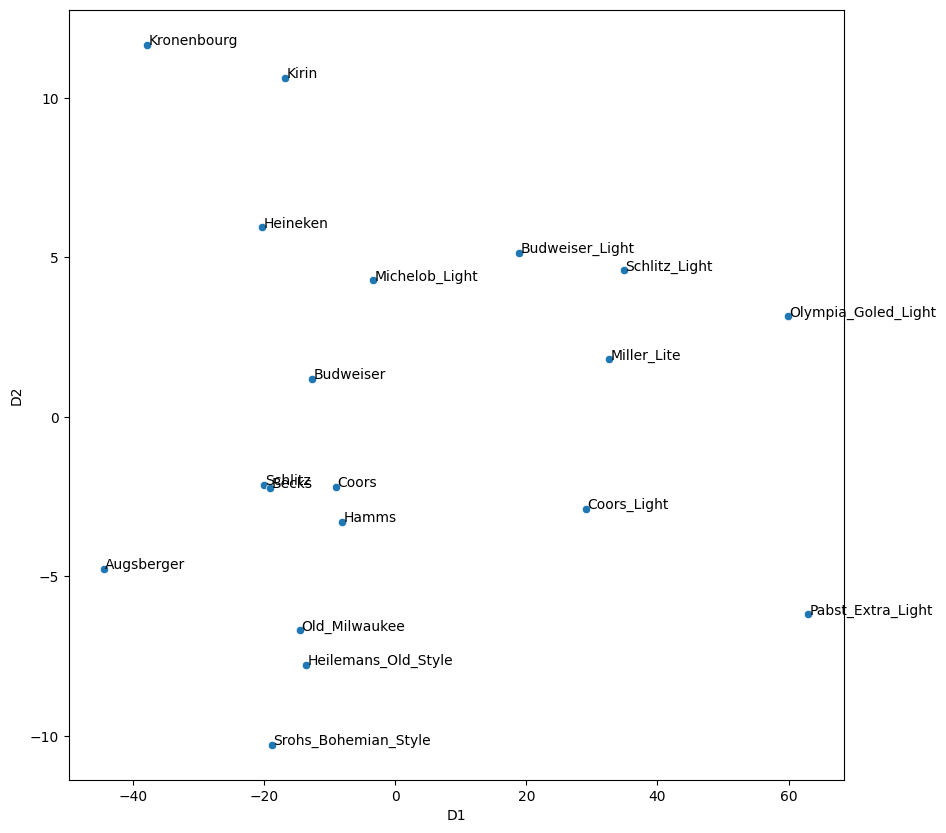

In [17]:
plt.figure(figsize=(10, 10))
sn.scatterplot(data = beer_2d_df,
               x = 'D1',
               y = 'D2');

beer_df

# add annotations one by one with a loop
for line in range( 0, beer_df.shape[0] ):
     plt.text(beer_2d_df.D1[line]+0.2,
              beer_2d_df.D2[line],
              beer_df.name[line],
              horizontalalignment='left',
              size='medium',
              color='black')

plt.show()